In [1]:
# basic imports
from warnings import filterwarnings
filterwarnings(action='ignore')
import numpy as np 
import pandas as pd 
import copy

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#for encoding
from sklearn import preprocessing

# feature importance 
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE


# for ASSUMPTIONS
from statsmodels.api import OLS
from scipy.stats import jarque_bera
from scipy.stats import probplot
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.api import het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# for ml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV,LassoCV,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
df=pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df1=copy.deepcopy(df)
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dropping Unnecessary columns

In [4]:
df1.drop(['name','id','host_name','last_review','latitude','longitude'],axis=1,inplace=True)
df1['reviews_per_month']=df1['reviews_per_month'].replace(np.nan, 0)

### OneHot Encoding for neighbourhood_group and room_type

In [5]:
df_neighbourhood_group=pd.get_dummies(df1['neighbourhood_group'],drop_first=True,prefix='neighbourhood_group',prefix_sep='_')

In [6]:
df_room_type=pd.get_dummies(df1['room_type'],drop_first=True,prefix='room_type',prefix_sep='_')

### Label Encoding for neighbourhood

In [7]:
le = preprocessing.LabelEncoder()
le.fit(df1['neighbourhood'])
df1['neighbourhood']=le.transform(df1['neighbourhood'])


In [8]:
df1=df1.drop(['neighbourhood_group','room_type'],axis=1)

In [9]:
df_final = pd.concat([df1,df_neighbourhood_group,df_room_type],axis=1)

In [10]:
df_final.head()

,host_id,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,2787,108,149,1,9,0.21,6,365,1,0,0,0,1,0
1,2845,127,225,1,45,0.38,2,355,0,1,0,0,0,0
2,4632,94,150,3,0,0.00,1,365,0,1,0,0,1,0
3,4869,41,89,1,270,4.64,1,194,1,0,0,0,0,0
4,7192,61,80,10,9,0.10,1,0,0,1,0,0,0,0


## Base Model

In [11]:
lm = LinearRegression()

X = df_final.drop('price',axis=1)
y = df_final['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
y_pred=lm.predict(X_test)

In [13]:
lm.score(X_train,y_train)

0.08841093627291507

In [14]:
lm.score(X_test,y_test)

0.10877703712218158

Text(0.5, 1.0, 'Actual vs Predicted Price')

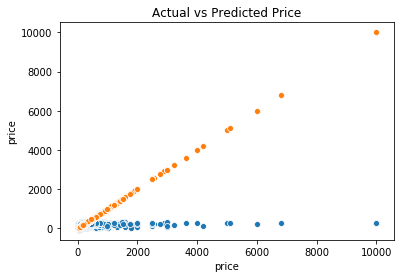

In [15]:
sns.scatterplot(y_test,y_pred)
sns.scatterplot(y_test,y_test)
plt.title("Actual vs Predicted Price")

## Feature Ranking

In [16]:
# visualizing multicolinearity between variables
df_final.corr()[np.abs(df_final.corr()) > 0.5] #not much relations hae corr>0.5,try to change the threshold

,host_id,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
host_id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minimum_nights,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,NaN,NaN,NaN,NaN,1.000000,0.589407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews_per_month,NaN,NaN,NaN,NaN,0.589407,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calculated_host_listings_count,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group_Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,-0.74524,NaN,NaN,NaN,NaN
neighbourhood_group_Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.74524,1.00000,NaN,NaN,NaN,NaN


In [17]:
# ranking features 
x = df_final.drop(columns=['price'])
y = df_final['price'].ravel()

In [18]:
# create a base classifier used to evaluate a subset of attributes
model = LinearRegression()

In [19]:
# create the RFE model and select top 3 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(x,y)

In [20]:
d = {'feature':x.columns,'Rankings':rfe.ranking_}
rankings = pd.DataFrame(d).sort_values(by='Rankings')
rankings

,feature,Rankings
3,number_of_reviews,1
4,reviews_per_month,1
5,calculated_host_listings_count,1
6,availability_365,1
7,neighbourhood_group_Brooklyn,1
8,neighbourhood_group_Manhattan,1
9,neighbourhood_group_Queens,1
10,neighbourhood_group_Staten Island,1
11,room_type_Private room,1
12,room_type_Shared room,1


In [21]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(x,y)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [22]:

# display the relative importance of each attribute
importance_val = model.feature_importances_
importance_df = pd.DataFrame(dict(feature=x.columns,importance=importance_val))
importance_df.sort_values(by='importance',ascending=False)

,feature,importance
0,host_id,0.232413
4,reviews_per_month,0.166471
3,number_of_reviews,0.143665
6,availability_365,0.141137
2,minimum_nights,0.129718
1,neighbourhood,0.114822
5,calculated_host_listings_count,0.058409
11,room_type_Private room,0.007826
8,neighbourhood_group_Manhattan,0.001595
12,room_type_Shared room,0.001399


In [23]:

# merging rankings and feature importance 
imp_rank = pd.merge(left=rankings,right=importance_df,on='feature')
imp_rank

,feature,Rankings,importance
0,number_of_reviews,1,0.143665
1,reviews_per_month,1,0.166471
2,calculated_host_listings_count,1,0.058409
3,availability_365,1,0.141137
4,neighbourhood_group_Brooklyn,1,0.001050
5,neighbourhood_group_Manhattan,1,0.001595
6,neighbourhood_group_Queens,1,0.001029
7,neighbourhood_group_Staten Island,1,0.000467
8,room_type_Private room,1,0.007826
9,room_type_Shared room,1,0.001399


## Building an OLS model

In [24]:
x = df_final.drop(columns=['price','host_id','minimum_nights','neighbourhood'])
y = df_final[['price']]

In [25]:
# OLS
x['const'] = 1
model = OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     501.8
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:37:35   Log-Likelihood:            -3.3500e+05
No. Observations:               48895   AIC:                         6.700e+05
Df Residuals:                   48884   BIC:                         6.701e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
number_of_reviews                    -0.2383      0.029     -8.209      0.000      -0.295      -0.181
reviews_per_month                    -3.7019      0.809     -4.574      0.000      -5.288      -2.116
calculated_host_listings_count       -0.1136      0.033     -3.443      0.001      -0.178      -0.049
availability_365                      0.1902      0.008     22.812      0.000       0.174       0.206
neighbourhood_group_Brooklyn         31.9403      7.142      4.472      0.000      17.941      45.939
neighbourhood_group_Manhattan        87.5064      7.148     12.242      0.000      73.496     101.517
neighbourhood_group_Queens           13.8464      7.566      1.830      0.067      -0.984      28.676
neighbourhood_group_Staten Island     7.5414     13.726      0.549      0.583     -19.361      34.444
room_type_Private room             -111.3287      2.140    -52.034      0.000    -115.522    -107.135
room_type_Shared room              -144.5964      6.899    -20.961      0.000    -158.118    -131.075
const                               142.3742      7.222     19.715      0.000     128.220     156.529
==============================================================================
Omnibus:                   110091.977   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        975229271.010
Skew:                          21.315   Prob(JB):                         0.00
Kurtosis:                     693.559   Cond. No.                     2.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear Model on Price per night

In [26]:
df_final['Price_per_night']=df_final['price']/df_final['minimum_nights']

In [27]:
lm = LinearRegression()

X = df_final.drop(columns=['price','host_id','Price_per_night'])
y = df_final['Price_per_night']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
y_pred=lm.predict(X_test)

In [29]:
lm.score(X_train,y_train)

0.03745905869069355

In [30]:
lm.score(X_test,y_test)

0.05021525965677087

Text(0.5, 1.0, 'Actual vs Predicted Price')

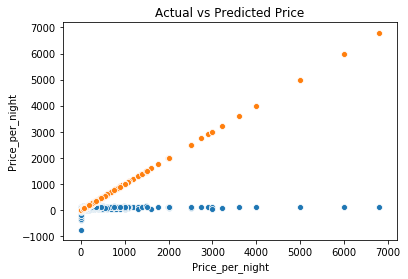

In [31]:
sns.scatterplot(y_test,y_pred)
sns.scatterplot(y_test,y_test)
plt.title("Actual vs Predicted Price")

## RandomForestRegressor Model on Price per night

In [32]:
RF=RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [33]:
X = df_final.drop(columns=['price','host_id','Price_per_night'])
y = df_final['Price_per_night']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [34]:
y_pred_rf=RF.predict(X_test)

In [35]:
RF.score(X_train,y_train)

0.8059867785235548

In [36]:
RF.score(X_test,y_test)

0.25499358638806224

Text(0.5, 1.0, 'Actual vs Predicted Price')

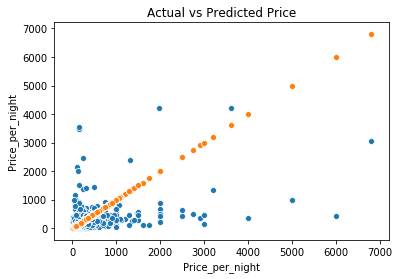

In [37]:
sns.scatterplot(y_test,y_pred_rf)
sns.scatterplot(y_test,y_test)
plt.title("Actual vs Predicted Price")

## DecisionTreeRegressor Model on Price per night

In [38]:
DT=DecisionTreeRegressor(criterion='mse',splitter='best')

In [39]:
X = df_final.drop(columns=['price','host_id','Price_per_night'])
y = df_final['Price_per_night']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

DT.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [40]:
y_pred_dt=DT.predict(X_test)

In [41]:
DT.score(X_train,y_train)

0.8754665037220828

In [42]:
DT.score(X_test,y_test)

0.10013944050056932

Text(0.5, 1.0, 'Actual vs Predicted Price')

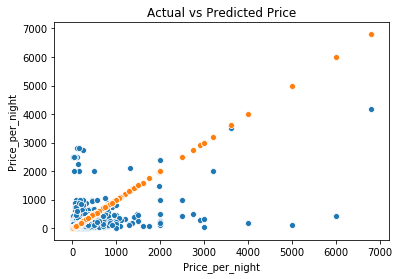

In [43]:
sns.scatterplot(y_test,y_pred_dt)
sns.scatterplot(y_test,y_test)
plt.title("Actual vs Predicted Price")

In [44]:
df.describe(include=['O'])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [56]:
df1.columns

Index(['host_id', 'neighbourhood', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [55]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod=ols('price ~room_type_Privateroom',data=df1).fit()
aov_table=sm.stats.anova_lm(mod,typ=1)
print(aov_table)

PatsyError: Error evaluating factor: NameError: name 'room_type_Privateroom' is not defined
    price ~room_type_Privateroom
           ^^^^^^^^^^^^^^^^^^^^^

In [ ]:
 df1=df[room_type]